#Installing Dependencies

In [1]:
!pip install pygame
!pip install optuna

# Importing Libraries

In [2]:
import os, sys, os.path
import time
import random
import numpy as np
import math

In [3]:
import pygame

import gym

import cv2
from google.colab.patches import cv2_imshow
from google.colab import output

from keras.datasets import mnist
from matplotlib import pyplot
from PIL import Image
from google.colab import drive
drive.mount('/content/drive/')

pygame 2.1.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from PIL import Image
from scipy import spatial
from torchvision.transforms import Compose, Resize, ToTensor
import time
import torch.optim as optim
from torchsummary import summary
import torchvision.transforms as transforms
import cv2

In [5]:
from PIL import Image
import os, os.path
import time
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import sys
import datetime
import time
import math
import json
from pathlib import Path
from functools import partial


import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.distributed as dist
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models as torchvision_models
import torchvision

import subprocess
from collections import defaultdict, deque

import numpy as np
import torch
from torch import nn
import torch.distributed as dist
from PIL import ImageFilter, ImageOps
import random
import torch.distributed as dist


In [6]:
from scipy import spatial
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import pandas as pd
from PIL import Image
import os, os.path
import time
from sklearn.metrics import accuracy_score,classification_report
from scipy.spatial import distance

# Loading and visualising Mnist

## Loading Mnist

In [7]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Visualising Mnist

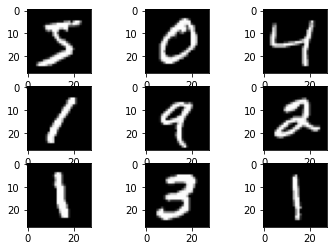

In [8]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

#Environment

In [9]:

window_width, window_height = 250, 80
os.environ["SDL_VIDEODRIVER"] = "dummy"
class CustomEnv(gym.Env):
    def __init__(self,env_config={},n_objects=2,debug=False):
      self.n_objects = n_objects
      self.corpus = {
      0 : 'zero',
      1 : 'one',
      2 : 'two',
      3 : 'three',
      4 : 'four',
      5 : 'five',
      6 : 'six',
      7 : 'seven',
      8 : 'eight',
      9 : 'nine', 
      }
      self.sprites_to_train = 2
      self.action_space = gym.spaces.Discrete(4)
      self.observation_space = gym.spaces.Box(
      low=0, high=255, shape=(window_height,window_width), dtype=np.float16)
      (self.trainx, self.trainy), (self.testx, self.testy) = self.loadDataset('mnist')
      self.classes = set(trainy)
      self.classes_len = len(self.classes)
      self.debug = debug
      # summarize loaded dataset
      if self.debug == True:
        print("|------------------ Dataset -----------------|")
        print(f'Train: X={self.trainx.shape}, y={self.trainy.shape}')
        print(f'Test: X={self.testx.shape}, y={self.testy.shape}')
        print(f'Classes: Unique={self.classes}, len={self.classes_len}')
        print("|--------------------------------------------|")
      self.reset()
    def loadDataset(self,dataset_name):
      if dataset_name == 'mnist':
        return mnist.load_data()

    def generate_unique_random(self,prev,corpus):
        
        input = random.choice(list(corpus.keys()))
        if (input in prev):
          while (input in prev):
            input = random.choice(list(corpus.keys()))
        return input

    def get_image_from_label(self,data,label):
        #get all indexes for given label from data and select an image as random 
        indexes = []
        for i in range(len(data[1])):
          if label == data[1][i]:
            indexes.append(i)        
        image_pixel= np.array(data[0][random.choice(indexes)]).T
        #img = Image.fromarray(image_pixel)
        return image_pixel

    def reset(self):
        pygame.init()
        pygame.font.init()
        self.window = pygame.display.set_mode((window_width, window_height))
        #self.myfont = pygame.font.SysFont(random.choice(sys_font_list), 15)
        self.myfont = pygame.font.SysFont("Arial", 15)
        self.clock = pygame.time.Clock()
        self.window.fill(0)
        self.objects = []
        self.instruction_pane_width = 120
        self.instruction_pane_height = window_height
        self.instruction_pane_x = window_width - self.instruction_pane_width
        self.instruction_pane_y = 0
        #Create agent
        
        self.inputs_choosen = []
        self.init_sprite("agent_0",0,0,15,15,path="./drive/MyDrive/Final Project/assets/mouse.png")  
        for i in range(self.sprites_to_train):
          #ensure same input is not choosen again
          input_label = self.generate_unique_random(self.inputs_choosen,self.corpus)
          sprite_iamge = self.get_image_from_label((self.trainx,self.trainy),input_label)
          #display inputs chosen
          # pyplot.imshow(sprite_iamge, cmap=pyplot.get_cmap('gray'))
          # pyplot.show()
          self.init_sprite("sprite_"+str(i),(i*45)+10,10,42,42,label_class = input_label,image = sprite_iamge,label=input_label,label_text=self.corpus[input_label],augmentation=True)
          self.inputs_choosen.append(input_label)
        if self.debug == True:
          print(f"Env Objects: {self.objects}")
        self.selected_instruction = random.choice(self.inputs_choosen)
        if self.debug == True:
          print(f"self.inputs_choosen: {self.inputs_choosen} self.selected_instruction {self.selected_instruction}")
        self.done = True
        self.render_screen()
        return self.observation_to_img(),self.inputs_choosen,self.selected_instruction

    def random_augmentation(self,sprite):
        #implement code for random augmentation here
        return sprite

    def init_sprite(self,id,x,y,width,height,label_class=None,path=None,image=None,label = None,label_text = None,augmentation=False):
        if path != None:
          sprite = pygame.transform.scale(pygame.image.load(path).convert_alpha(), (width,height)) 
        else:
          sprite = pygame.transform.scale(pygame.surfarray.make_surface(image), (width,height))
        if augmentation == True:
          sprite = self.random_augmentation(sprite) 
        color = (255,255,255)
        
        if label == None:
          self.objects.append(
            {
                "id" : id,
                "sprite" : sprite,
                "collision_box" : sprite.get_rect(x=(window_width - self.instruction_pane_width)/2, y=(window_height)/2),
                "color" : color,
                "path" : path,
            }
          )
        else:
          if id == "sprite_0":
            self.objects.append(
                {
                    "id" : id,
                    "sprite" : sprite,
                    "collision_box" : sprite.get_rect(x=0, y=y),
                    "label_text" : label_text,
                    "label" : self.myfont.render(label_text, False, color),
                    "label_position" : (x,y+height+5),
                    "label_class": label_class,
                    "color" : color,
                    "path" : path,
                }
            )
          if id == "sprite_1":
            self.objects.append(
                {
                    "id" : id,
                    "sprite" : sprite,
                    "collision_box" : sprite.get_rect(x=window_width - self.instruction_pane_width-width, y=y),
                    "label_text" : label_text,
                    "label" : self.myfont.render(label_text, False, color),
                    "label_position" : (window_width - self.instruction_pane_width-width,y+height+5),
                    "label_class": label_class,
                    "color" : color,                 
                    "path" : path,
                }
            )
    def check_agent_collision(self):
      sprite_collision_boxes = []
      for i in range(len(self.objects)):
        if self.objects[i]["id"] == "agent_0":
          agent_collision_box = self.objects[i]["collision_box"]
        else:
          sprite_collision_boxes.append(self.objects[i]["collision_box"])
      for i in range(len(sprite_collision_boxes)):
        if sprite_collision_boxes[i].colliderect(agent_collision_box):
          #print(f"Collision Detected between agent_0 and sprite_{i}")
          return True,"sprite_"+str(i)
      return False,None
    def move_sprite(self,id,x,y):
      for i in range(len(self.objects)):
        if self.objects[i]["id"] == id:
          collision_box = self.objects[i]["collision_box"]
          
          self.objects[i]["collision_box"] = self.objects[i]["sprite"].get_rect(x=collision_box.x+x, y=collision_box.y+y)
          collision_box = self.objects[i]["collision_box"]

        if collision_box.x >= window_width - self.instruction_pane_width or collision_box.x < 0 or collision_box.y >= window_height or collision_box.y < 0:
          self.done = True
    def step(self, action=np.zeros((4),dtype=np.int32)):
        if action == 0:  # Right
          self.move_sprite("agent_0",1,0)
        if action == 1:  # Left
          self.move_sprite("agent_0",-1,0)
        if action == 2:  # Up
          self.move_sprite("agent_0",0,-1)
        if action == 3:  # Down
          self.move_sprite("agent_0",0,1)
        collision,id = self.check_agent_collision() 
        if collision:
          for i in range(len(self.objects)):
            if self.objects[i]["id"] == id and self.objects[i]["label_class"] == self.selected_instruction:
              observation, reward, done, info = self.observation_to_img(), 100, self.done, {}
              self.reset()
              break;
            else:
              observation, reward, done, info = self.observation_to_img(), 0, self.done, {}

        else:
          observation, reward, done, info = self.observation_to_img(), 0, self.done, {}
        return observation, reward, done, info

    def observation_to_img(self):
        pygame.display.update()
        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(self.window)
        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])
        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2GRAY)
        return img_bgr

    def render_instructions(self):
        pygame.draw.rect(self.window, (0, 0,0), (self.instruction_pane_x,self.instruction_pane_y,self.instruction_pane_width,self.instruction_pane_height))
        title = self.myfont.render('Instructions:', False, (255, 255, 255))
        self.window.blit(title,(self.instruction_pane_x+20,20))
        instruction_1 = self.myfont.render(f'Find {self.corpus[self.selected_instruction]}', False, (255, 255, 255))
        self.window.blit(instruction_1,(self.instruction_pane_x+20,40))

    def render_screen(self):
        self.window.fill(0)
        # draw orientation
        # p1 = (self.x - 10 * np.cos(self.ang),self.y + 10 * np.sin(self.ang))
        # p2 = (self.x + 15 * np.cos(self.ang),self.y - 15 * np.sin(self.ang))
        # pygame.draw.line(self.window,(0,100,100),p1,p2,2)
        self.render_instructions()
        for elem in self.objects:
          self.window.blit(elem["sprite"], elem["collision_box"])
          if "label" in elem.keys():
            self.window.blit(elem["label"],elem["label_position"])
        #Display image, clear cell every 0.5 seconds
        #cv2_imshow(self.observation_to_img())
    def render(self):
        self.render_screen()
        time.sleep(0.1)
        output.clear()

environment = CustomEnv()
rewards = []


# Utils

## Detach & Crop

### Train

In [10]:
# training and validation loss were calculated after every epoch
def transform(img):
    transform = transforms.Compose([
    transforms.RandomApply(transforms = [
    #transforms.RandomHorizontalFlip(p=0.5),
      # transforms.RandomApply(
      #     [transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)],
      #     p=0.8
      # ),
      # transforms.RandomRotation(
      #     degrees=45
      # ),  # Perhaps a random rotation from -45 to 45 degrees
    #   #transforms.RandomInvert(),
    #   #transforms.RandomEqualize(),
    #   # transforms.RandomHorizontalFlip(
    #   #     p=0.5
    #   # ),  # Flips the image horizontally with probability 0.5
    #   # transforms.RandomVerticalFlip(
    #   #     p=0.05
    #   # ),  # Flips image vertically with probability 0.05

    transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.6))
    ],p=0.5),
    transforms.ToTensor()
    # ,  # Finally converts PIL image to tensor so we can train w. pytorch
    # transforms.Normalize(
    #     mean=[0.5], std=[0.5]
    # ), 
    ])
    transformed_img = transform(img).numpy()
    return transformed_img

def detach_cropped_area(im,coods,debug = False):
  im_width = 224
  im_height = 224
  area = coods
  cropped_img = im.crop(area)
  newimage = cropped_img.resize((im_width,im_height))
  scaler = MinMaxScaler(feature_range=(0,1))
  scaler.fit(newimage)
  newimage = scaler.transform(newimage)
  #numpy_array = np.asarray(cropped_img)
  # if debug == True && False:
  #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
  # print(newimage)
  # pyplot.imshow(newimage)
  # pyplot.show()
  #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
  # if debug == True:
  #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
  #   pyplot.imshow(Image.fromarray(numpy_array))
  #   pyplot.show()
  return transform(Image.fromarray(newimage))

### Test

In [11]:
def detach_cropped_area_test(im,coods,debug = False):
  im_width = 224
  im_height = 224
  area = coods
  cropped_img = im.crop(area)
  newimage = cropped_img.resize((im_width,im_height))
  scaler = MinMaxScaler(feature_range=(0,1))
  scaler.fit(newimage)
  newimage = scaler.transform(newimage)
  #numpy_array = np.asarray(cropped_img)
  # if debug == True && False:
  #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
  # print(newimage)
  # pyplot.imshow(newimage)
  # pyplot.show()
  #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
  # if debug == True:
  #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
  #   pyplot.imshow(Image.fromarray(numpy_array))
  #   pyplot.show()
  return newimage

## Test Dataset Generator

In [12]:
class DatasetTest(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
        self.label =[]
        self.images = []
        self.img_width,self.img_height = width,height
        start_time = time.time()
        for i in range(num_samples):
          self.image,input_digits,selected_digit = environment.reset()
          self.images.append(self.image)
          self.label.append(input_digits.index(selected_digit))
        print("|------Test Dataset Generated------|")
        print(f"Total Images {np.array(self.images).shape} Labels {len(self.label)} Time to load: {time.time() - start_time} seconds")
    def __getitem__(self, idx):
        
        im = Image.fromarray(self.images[idx])
        label = self.label[idx]
        input_1 = torch.tensor(detach_cropped_area_test(im,(0, 10, 52, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        label_1 = torch.tensor(detach_cropped_area_test(im,(0, 52, 52, 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        input_2 = torch.tensor(detach_cropped_area_test(im,(85, 10, 130, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height )
        label_2 = torch.tensor(detach_cropped_area_test(im,(85, 52, 130 , 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        query = torch.tensor(detach_cropped_area_test(im,(180, 35, 230 , 60)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)


        return  input_1, label_1, input_2 , label_2, query, label
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return len(self.images)
testDataset = DatasetTest(300)


|------Test Dataset Generated------|
Total Images (300, 80, 250) Labels 300 Time to load: 84.25263571739197 seconds


## Trunc Normal

In [13]:
def _no_grad_trunc_normal_(tensor, mean, std, a, b):
    # Cut & paste from PyTorch official master until it's in a few official releases - RW
    # Method based on https://people.sc.fsu.edu/~jburkardt/presentations/truncated_normal.pdf
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / math.sqrt(2.))) / 2.

    with torch.no_grad():
        # Values are generated by using a truncated uniform distribution and
        # then using the inverse CDF for the normal distribution.
        # Get upper and lower cdf values
        l = norm_cdf((a - mean) / std)
        u = norm_cdf((b - mean) / std)

        # Uniformly fill tensor with values from [l, u], then translate to
        # [2l-1, 2u-1].
        tensor.uniform_(2 * l - 1, 2 * u - 1)

        # Use inverse cdf transform for normal distribution to get truncated
        # standard normal
        tensor.erfinv_()

        # Transform to proper mean, std
        tensor.mul_(std * math.sqrt(2.))
        tensor.add_(mean)

        # Clamp to ensure it's in the proper range
        tensor.clamp_(min=a, max=b)
        return tensor


def trunc_normal_(tensor, mean=0., std=1., a=-2., b=2.):
    # type: (Tensor, float, float, float, float) -> Tensor
    return _no_grad_trunc_normal_(tensor, mean, std, a, b)

# Siamese Network

## Dataloader Train

In [14]:
class SiamDataset(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
        self.verbose = verbose
        self.img_width,self.img_height = width,height
        start_time = time.time()
        # imgs = []
        # self.label = []
        # path = "/content/drive/MyDrive/Final Project/dataset/train/"
        # valid_images = [".jpg"]
        # count =0 
        # for f in os.listdir(path):
        #     ext = os.path.splitext(f)[1]
        #     if ext.lower() not in valid_images:
        #         continue
        #     if self.verbose:
        #       print(f"Loaded {count}")
        #     imgs.append(np.array(Image.open(os.path.join(path,f))))
        #     self.label.append(f[-5])
        #     count = count + 1
        #     if count >= num_samples:
        #       break
        # self.images = np.array(imgs)
        self.label =[]
        self.images = []
        self.img_width,self.img_height = width,height
        start_time = time.time()
        for i in range(num_samples):
          self.image,input_digits,selected_digit = environment.reset()
          self.images.append(self.image)
          self.label.append(input_digits.index(selected_digit))
        print("|------Test Dataset Generated------|")
        print(f"Total Images {np.array(self.images).shape} Labels {len(self.label)} Time to load: {time.time() - start_time} seconds")
        # print("|------Dataset Loaded------|")
        # print(f"Total Images {self.images.shape} Labels {len(self.label)} Time to load: {time.time() - start_time} seconds")
    
    def __getitem__(self, idx):
        
        im = Image.fromarray(self.images[idx])
        input_1 = detach_cropped_area(im,(0, 10, 52, 52))
        label_1 = detach_cropped_area(im,(0, 52, 52, 82))
        input_2 = detach_cropped_area(im,(85, 10, 130, 52))
        label_2 = detach_cropped_area(im,(85, 52, 130 , 82))
        query = detach_cropped_area(im,(180, 35, 230 , 60))
        clas = np.random.randint(0,1)
        if  int(self.label[idx]) == 0:#int(self.label[idx])
          img1 = torch.tensor(np.reshape(query,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img2 = torch.tensor(np.reshape(input_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y1 = torch.tensor(np.ones(1,dtype=np.float32),dtype=torch.float32)
          img3 = torch.tensor(np.reshape(query,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img4 = torch.tensor(np.reshape(input_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y2 = torch.tensor(np.zeros(1,dtype=np.float32),dtype=torch.float32)
        if int(self.label[idx]) == 1:
          img1 = torch.tensor(np.reshape(query,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img2 = torch.tensor(np.reshape(input_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y1 = torch.tensor(np.ones(1,dtype=np.float32),dtype=torch.float32)
          img3 = torch.tensor(np.reshape(query,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img4 = torch.tensor(np.reshape(input_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y2 = torch.tensor(np.zeros(1,dtype=np.float32),dtype=torch.float32)

        return  img1, img2, y1, img3, img4, y2
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return len(self.images)

siamdset = SiamDataset(5000)


|------Test Dataset Generated------|
Total Images (5000, 80, 250) Labels 5000 Time to load: 1404.0512959957123 seconds


-------------------------------
-------------------------------
Label 1 tensor([[1.]])
------------img1-------------


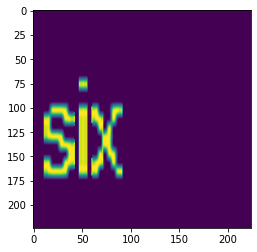

------------img2-------------


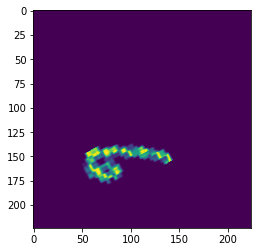

Label 2 tensor([[0.]])
------------img3-------------


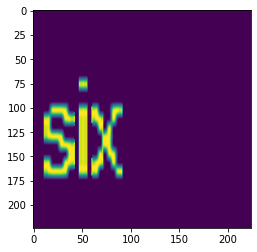

------------img4-------------


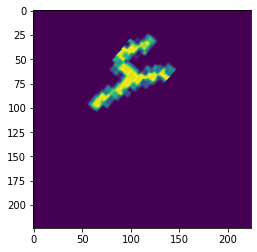

-------------------------------
-------------------------------


In [15]:
#Driver Code
train_dataloader = DataLoader(siamdset, shuffle=True, batch_size=1,num_workers=4)
for itr,data in enumerate(train_dataloader):
  img1, img2 , label1, img3, img4, label2 = data

  # dista =nn.functional.pairwise_distance(output1,output2 )
  # distb =nn.functional.pairwise_distance(output3,output4 )
  print("-------------------------------")
  print("-------------------------------")
  print(f"Label 1 {label1}")
  print("------------img1-------------")
  im = pyplot.imshow(img1[0].numpy().reshape(224,224))
  pyplot.show()
  print("------------img2-------------")
  im = pyplot.imshow(img2[0].numpy().reshape(224,224))
  pyplot.show()
  print(f"Label 2 {label2}")
  print("------------img3-------------")
  im = pyplot.imshow(img3[0].numpy().reshape(224,224))
  pyplot.show()
  print("------------img4-------------")
  im = pyplot.imshow(img4[0].numpy().reshape(224,224))
  pyplot.show()
  print("-------------------------------")
  print("-------------------------------")
  break

## Validation accuracy custom dataset

In [16]:
def validationAccuracy_custom(trained_model):
  
  test_dataloader = DataLoader(testDataset, shuffle=True, batch_size=1,num_workers=4)
  with torch.no_grad():
    model.eval()
    t_label = []
    p_labels = []
    for itr,data in enumerate(test_dataloader):
        # if itr > 5:
        #   break
        input_1, label_1, input_2 , label_2, query, label = data
        img1 =  query
        img3 = img1
        img2 = input_1
        img4 = input_2
        dista= model(img1[0].reshape(1,1,224,224).cuda(),img2[0].reshape(1,1,224,224).cuda())
        distb = model(img3[0].reshape(1,1,224,224).cuda(),img4[0].reshape(1,1,224,224).cuda())
        # dista =nn.functional.pairwise_distance(output1,output2 )
        # distb =nn.functional.pairwise_distance(output3,output4 )
        # print("-------------------------------")
        # print("-------------------------------")
        # print("------------img1-------------")
        # print(img1.shape)
        # im = pyplot.imshow(img1[0].numpy().reshape(224,224))
        # pyplot.show()
        # print("------------img2-------------")
        # im = pyplot.imshow(img2[0].numpy().reshape(224,224))
        # pyplot.show()
        # print(f"Similarity Img 1  & Img 2 {dista}")
        # print("------------img3-------------")
        # im = pyplot.imshow(img3[0].numpy().reshape(224,224))
        # pyplot.show()
        # print("------------img4-------------")
        # im = pyplot.imshow(img4[0].numpy().reshape(224,224))
        # pyplot.show()
        # print(f"Similarity Img 3  & Img 4 {distb}")
        # print("-------------------------------")
        # print("-------------------------------")

        p_label = 0
        if (dista[0] < distb[0]):
          p_label = 1
        t_label.append(label)
        p_labels.append(p_label)

        #print(f"dista: {dista} distb: {distb}")   
  print(f"Validation accuracy: {classification_report(t_label,p_labels, target_names=['class 0','class 1'])}")

## Network

In [17]:

class CNNSiameseNet(nn.Module):
    
    def __init__(self):
        super(CNNSiameseNet,self).__init__()
        
        # A simple two layer convolution followed by three fully connected layers should do
        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        
        self.pool1 = nn.MaxPool2d( kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d( kernel_size=3)
        
        self.lin1 = nn.Linear(20736, 512)
        self.lin2 = nn.Linear(512, 256)
        self.lin3 = nn.Linear(256, 128)
        self.out = nn.Linear(128, 1)
        self.cos = nn.CosineSimilarity(dim=1, eps=1e-6)
    def forward_once(self,x):
        
        # forwarding the input through the layers
          
        out = self.pool1(nn.functional.relu(self.conv1(x)))
        out = self.pool2(nn.functional.relu(self.conv2(out)))
        
        out = out.view(-1,20736)
        out = nn.functional.relu(self.lin1(out))
        out = nn.functional.relu(self.lin2(out))
        out = self.lin3(out)
        
        return out
    
    def forward(self, x, y):    
        
        # doing the forwarding twice so as to obtain the same functions as that of twin networks
        
        out1 = self.forward_once(x)
        out2 = self.forward_once(y)
        dis = torch.abs(out1 - out2)
        
        logits = torch.sigmoid(self.out(dis))
        #out = self.cos(out1, out2)
        return logits
    
    def evaluate(self, x, y):
        
        # this can be used later for evalutation
        
        m = to.tensor(1.0, dtype=to.float32)
        
        if type(m) != type(x):
            x = to.tensor(x, dtype = to.float32, requires_grad = False)
            
        if type(m) != type(y):
            y = to.tensor(y, dtype = to.float32, requires_grad = False)
        
        x = x.view(-1,1,28,28)
        y = y.view(-1,1,28,28)
        
        with to.no_grad():
            
            out1, out2 = self.forward(x, y)
            
            return nn.functional.pairwise_distance(out1, out2)

## Train One Epoch

In [18]:
def train_Siamese(model,batch_size, num_epochs, Criterion,Optimizer):
    train_losses = []
    #val_losses = []
    cur_step = 0
    train_dataloader = DataLoader(siamdset, shuffle=True, batch_size= batch_size,num_workers=4)
    #train_dataloader_mnist = DataLoader(MnistDatasetTrain, shuffle=True, batch_size=  batch_size,num_workers=4)
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        #print(f"Starting epoch {str(epoch+1)} / {num_epochs}")
        correct_batch_prediction_count = 0
        start_time = time.time()
        for count_idx,data in enumerate(train_dataloader):
          img1, img2 , label1, img3, img4, label2 = data
          Optimizer.zero_grad()
        
          # here we obtain the positive pairs' loss as well as the negative pairs' loss
          #print(np.array(img1.shape))
          output1 = model(img1.cuda(),img2.cuda())
          loss_pos = Criterion(output1.reshape(-1,1),label1.cuda())
          loss_pos.backward()
          running_loss += loss_pos.item()
          Optimizer.step()
          Optimizer.zero_grad()
          output3 = model(img3.cuda(),img4.cuda())
          loss_neg = Criterion(output3.reshape(-1,1),label2.cuda())
          loss_neg.backward()
          running_loss += loss_neg.item()
          Optimizer.step()
          # print("------------")
          # print(nn.functional.pairwise_distance(output1,output2 ))
          # print(nn.functional.pairwise_distance(output3,output4 ))
          # print("------------")
          
          
          
          # the total loss is then computed and back propagated
          #print(f"SImilar {output1} Dissimilar{output3}")
          #loss_contrastive = loss_pos + loss_neg
          
          
        avg_train_loss = running_loss / batch_size
        train_losses.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}],Train Loss: {avg_train_loss} Time: {time.time() - start_time}')
        if (epoch+1) % 10 == 0:
          validationAccuracy_custom(model)
    #print("Finished Training Saving Weights") 
        torch.save(model.state_dict(), "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/siamese.pth")
 
    return train_losses

## Main Method

In [19]:
model = CNNSiameseNet()
#summary(model, [(1,224,224),(1,224,224)])
model = model.cuda()
pretrained_weight_path = "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/siamese.pth"
# if os.path.isfile(pretrained_weight_path):
#model.load_state_dict(torch.load(pretrained_weight_path))
params = model.parameters()
#params_groups = get_params_groups(model)
#optimizer = LARS(params_groups)
optimizer = torch.optim.Adam(params,lr = 0.001 )#optim.SGD(params, lr=0.001, momentum=0.5)
loss = torch.nn.BCELoss()#ContrastiveLoss()#
#optimizer = torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
train_Siamese(model,16,100,loss,optimizer)

Epoch [1/100],Train Loss: 26.97748626768589 Time: 21.10667109489441
Epoch [2/100],Train Loss: 26.317486241459846 Time: 21.714252471923828
Epoch [3/100],Train Loss: 25.482425639405847 Time: 21.59711217880249
Epoch [4/100],Train Loss: 24.74033400043845 Time: 21.183207511901855
Epoch [5/100],Train Loss: 24.43188768811524 Time: 21.125073432922363
Epoch [6/100],Train Loss: 23.902964025735855 Time: 20.997026443481445
Epoch [7/100],Train Loss: 23.74143316410482 Time: 21.05644917488098
Epoch [8/100],Train Loss: 23.298226203769445 Time: 21.22525453567505
Epoch [9/100],Train Loss: 23.08941718004644 Time: 21.844350337982178
Epoch [10/100],Train Loss: 22.80544894747436 Time: 22.278966188430786
Validation accuracy:               precision    recall  f1-score   support

     class 0       0.88      0.91      0.89       158
     class 1       0.89      0.86      0.87       142

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg    

[26.97748626768589,
 26.317486241459846,
 25.482425639405847,
 24.74033400043845,
 24.43188768811524,
 23.902964025735855,
 23.74143316410482,
 23.298226203769445,
 23.08941718004644,
 22.80544894747436,
 22.92409641109407,
 22.709092684090137,
 22.247918562963605,
 22.451083747670054,
 22.368175473064184,
 22.059399336576462,
 21.832067609764636,
 21.73495906032622,
 21.520868592895567,
 21.152747303247452,
 21.050115130841732,
 20.631811724975705,
 20.538990759290755,
 20.293782190419734,
 19.779515993781388,
 19.716714684851468,
 19.36880996543914,
 19.434124119579792,
 19.23150443471968,
 19.203526844270527,
 18.843794179148972,
 18.835087559185922,
 18.52025467157364,
 18.415298948064446,
 18.41688483580947,
 17.963978175073862,
 17.629147278144956,
 17.893497967161238,
 17.469237214885652,
 17.32438879739493,
 17.32836271636188,
 17.536002949345857,
 16.974340494722128,
 17.03937564510852,
 16.908628603443503,
 16.45588628947735,
 16.769542625639588,
 16.345819814130664,
 16.4445